In [1]:
import sqlite3

In [2]:
connection = sqlite3.connect("employee.db")

In [3]:
connection

In [4]:
table_creation_query = """
CREATE TABLE IF NOT EXISTS employees (
    emp_id INTEGER PRIMARY KEY,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL,
    hire_date TEXT NOT NULL,
    salary REAL NOT NULL
);
"""

In [5]:
table_creation_query2="""
CREATE TABLE IF NOT EXISTS customers (
    customer_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL,
    phone TEXT
);
"""

In [6]:
table_creation_query3="""
CREATE TABLE IF NOT EXISTS orders (
    order_id INTEGER PRIMARY KEY AUTOINCREMENT,
    customer_id INTEGER NOT NULL,
    order_date TEXT NOT NULL,
    amount REAL NOT NULL,
    FOREIGN KEY (customer_id) REFERENCES customers (customer_id)
);

"""

In [7]:
cursor=connection.cursor()

In [8]:
cursor.execute(table_creation_query)

In [9]:
cursor.execute(table_creation_query2)

In [10]:
cursor.execute(table_creation_query3)

In [11]:
insert_query = """
INSERT INTO employees (emp_id, first_name, last_name, email, hire_date, salary)
VALUES (?, ?, ?, ?, ?, ?);
"""

In [12]:
insert_query_customers = """
INSERT INTO customers (customer_id, first_name, last_name, email, phone)
VALUES (?, ?, ?, ?, ?);
"""

In [13]:
insert_query_orders = """
INSERT INTO orders (order_id, customer_id, order_date, amount)
VALUES (?, ?, ?, ?);
"""

In [14]:
employee_data = [
    (1, "Sunny", "Savita", "sunny.sv@abc.com", "2023-06-01", 50000.00),
    (2, "Arhun", "Meheta", "arhun.m@gmail.com", "2022-04-15", 60000.00),
    (3, "Alice", "Johnson", "alice.johnson@jpg.com", "2021-09-30", 55000.00),
    (4, "Bob", "Brown", "bob.brown@uio.com", "2020-01-20", 45000.00),
    ]

In [15]:
customers_data = [
    (1, "John", "Doe", "john.doe@example.com", "1234567890"),
    (2, "Jane", "Smith", "jane.smith@example.com", "9876543210"),
    (3, "Emily", "Davis", "emily.davis@example.com", "4567891230"),
    (4, "Michael", "Brown", "michael.brown@example.com", "7894561230"),
]

In [16]:
orders_data = [
    (1, 1, "2023-12-01", 250.75),
    (2, 2, "2023-11-20", 150.50),
    (3, 3, "2023-11-25", 300.00),
    (4, 4, "2023-12-02", 450.00),
]

In [17]:
cursor.executemany(insert_query,employee_data)

In [18]:
cursor.executemany(insert_query_customers,customers_data)

In [19]:
cursor.executemany(insert_query_orders,orders_data)

In [20]:
connection.commit()

In [21]:
cursor.execute("select * from employees;")

In [22]:
for row in cursor.fetchall():
    print(row)

(1, 'Sunny', 'Savita', 'sunny.sv@abc.com', '2023-06-01', 50000.0)
(2, 'Arhun', 'Meheta', 'arhun.m@gmail.com', '2022-04-15', 60000.0)
(3, 'Alice', 'Johnson', 'alice.johnson@jpg.com', '2021-09-30', 55000.0)
(4, 'Bob', 'Brown', 'bob.brown@uio.com', '2020-01-20', 45000.0)


In [23]:
cursor.execute("select first_name from employees where salary > 50000;")

In [24]:
cursor.fetchall()

[('Arhun',), ('Alice',)]

In [25]:
cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table';")

In [26]:
cursor.fetchall()

[('employees',), ('customers',), ('sqlite_sequence',), ('orders',)]

In [27]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [28]:
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")
GROQ_API_KEY = os.getenv("GROQ_API_KEY")

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [31]:
from langchain_groq import ChatGroq
llm = ChatGroq(model_name="Llama3-8b-8192")

In [32]:
llm.invoke("hello").content

"Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?"

In [33]:
# To load the database by using LangChain
from langchain_community.utilities import SQLDatabase
db = SQLDatabase.from_uri("sqlite:///employee.db")

In [34]:
print("Dialect:", db.dialect)
print("Usable tables:", db.get_usable_table_names())

Dialect: sqlite
Usable tables: ['customers', 'employees', 'orders']


In [35]:
query_result = db.run("SELECT * FROM employees;")
print("Query result from Employees table \n", query_result)

Query result from Employees table 
 [(1, 'Sunny', 'Savita', 'sunny.sv@abc.com', '2023-06-01', 50000.0), (2, 'Arhun', 'Meheta', 'arhun.m@gmail.com', '2022-04-15', 60000.0), (3, 'Alice', 'Johnson', 'alice.johnson@jpg.com', '2021-09-30', 55000.0), (4, 'Bob', 'Brown', 'bob.brown@uio.com', '2020-01-20', 45000.0)]


In [36]:
from langchain_community.agent_toolkits import SQLDatabaseToolkit

toolkit = SQLDatabaseToolkit(db=db, llm=llm)

tools = toolkit.get_tools()

In [37]:
tools[0]

QuerySQLDatabaseTool(description="Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields.", db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x0000019C1146F4D0>)

In [38]:
tools[1]

InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x0000019C1146F4D0>)

In [39]:
for tool in tools:
    print(tool.name)

sql_db_query
sql_db_schema
sql_db_list_tables
sql_db_query_checker


In [40]:
list_tables_tool = next((tool for tool in tools if tool.name == "sql_db_list_tables"), None)

In [41]:
list_tables_tool

ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x0000019C1146F4D0>)

In [42]:
get_schema_tool = next((tool for tool in tools if tool.name == "sql_db_schema"), None)

In [43]:
get_schema_tool

InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x0000019C1146F4D0>)

In [44]:
print(list_tables_tool.invoke(""))

customers, employees, orders


In [45]:
print(get_schema_tool.invoke("customers"))


CREATE TABLE customers (
	customer_id INTEGER, 
	first_name TEXT NOT NULL, 
	last_name TEXT NOT NULL, 
	email TEXT NOT NULL, 
	phone TEXT, 
	PRIMARY KEY (customer_id), 
	UNIQUE (email)
)

/*
3 rows from customers table:
customer_id	first_name	last_name	email	phone
1	John	Doe	john.doe@example.com	1234567890
2	Jane	Smith	jane.smith@example.com	9876543210
3	Emily	Davis	emily.davis@example.com	4567891230
*/


In [46]:
from langchain_core.tools import tool
@tool
def db_query_tool(query: str) -> str:
    """
    Execute a SQL query against the database and return the result.
    If the query is invalid or returns no result, an error message will be returned.
    In case of an error, the user is advised to rewrite the query and try again.
    """
    result = db.run_no_throw(query) # It automatically handles the exception.
    if not result:
        return "Error: Query failed. Please rewrite your query and try again."
    return result

In [47]:
print(db_query_tool.invoke("SELECT * FROM Employees LIMIT 10;"))

[(1, 'Sunny', 'Savita', 'sunny.sv@abc.com', '2023-06-01', 50000.0), (2, 'Arhun', 'Meheta', 'arhun.m@gmail.com', '2022-04-15', 60000.0), (3, 'Alice', 'Johnson', 'alice.johnson@jpg.com', '2021-09-30', 55000.0), (4, 'Bob', 'Brown', 'bob.brown@uio.com', '2020-01-20', 45000.0)]


In [48]:

from typing import Annotated, Literal
from langchain_core.messages import AIMessage
from pydantic import BaseModel, Field
from typing_extensions import TypedDict
from langgraph.graph import END, StateGraph, START
from langgraph.graph.message import AnyMessage, add_messages
from typing import Any
from langchain_core.messages import ToolMessage
from langchain_core.runnables import RunnableLambda, RunnableWithFallbacks
from langgraph.prebuilt import ToolNode

In [49]:
class SubmitFinalAnswer(BaseModel):
    """Submit the final answer to the user based on the query results."""
    final_answer: str = Field(..., description="The final answer to the user")

In [50]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [51]:
from langchain_core.prompts import ChatPromptTemplate
query_check_system = """You are a SQL expert with a strong attention to detail.
Double check the SQLite query for common mistakes, including:
- Using NOT IN with NULL values
- Using UNION when UNION ALL shouls have been used
- Using BETWEEN for exclusive ranges
- Data type mismatch in predicates
- Properly quoting indentifiers
- Using the correct number of arguments for functions
- Casting to the correct data type
- Using the proper columns for joins

If there are any of the above mistake, rewrite the query. If there are no mistakes, just reproduce the original query.

You will call the appropriate tool to execute the query after running this check."""

query_check_prompt = ChatPromptTemplate.from_messages([("system", query_check_system), ("placeholder", "{messages}")])

query_check = query_check_prompt | llm.bind_tools([db_query_tool])

In [52]:
query_check.invoke({"messages": [("user", "SELECT * FROM Employees LIMIT 5;")]})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'hjd7vjnah', 'function': {'arguments': '{"query":"SELECT * FROM Employees LIMIT 5;"}', 'name': 'db_query_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 107, 'prompt_tokens': 1058, 'total_tokens': 1165, 'completion_time': 0.089166667, 'prompt_time': 0.131972089, 'queue_time': 0.24905396100000002, 'total_time': 0.221138756}, 'model_name': 'Llama3-8b-8192', 'system_fingerprint': 'fp_dadc9d6142', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--30525fd5-49bd-4d50-9251-37825b4f08ad-0', tool_calls=[{'name': 'db_query_tool', 'args': {'query': 'SELECT * FROM Employees LIMIT 5;'}, 'id': 'hjd7vjnah', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1058, 'output_tokens': 107, 'total_tokens': 1165})

In [53]:
query_check.invoke({"messages": [("user", "SELECT + FROM Employees LIMIT 5;")]})

AIMessage(content='</tool-use>\n{\n  "tool_calls": []\n}\n</tool-use>\n\nThe query is syntactically correct, but it\'s missing the table name in the SELECT clause and the column list. Here\'s a corrected version:\n\nSELECT * FROM Employees LIMIT 5;\n\nIf the intention is to select all columns, it\'s better to use the SELECT * syntax instead of writing out each column name.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 81, 'prompt_tokens': 1058, 'total_tokens': 1139, 'completion_time': 0.0675, 'prompt_time': 0.197711295, 'queue_time': 0.5257552649999999, 'total_time': 0.265211295}, 'model_name': 'Llama3-8b-8192', 'system_fingerprint': 'fp_dadc9d6142', 'finish_reason': 'stop', 'logprobs': None}, id='run--3d47d6f5-f6e3-4024-9818-2e9c64a3136e-0', usage_metadata={'input_tokens': 1058, 'output_tokens': 81, 'total_tokens': 1139})

In [55]:
query_gen_system = """You are a SQL expert with a strong attention to detail.

Given an input question, output a syntactically correct SQLite query to run, then look at the results of the query and return the answer.

DO NOT call any tool besides SubmitFinalAnswer to submit the final answer.

When generating the query:

Output the SQL query that answers the input question without a tool call.

Unless the user specifies a specific number of examples they wish to obtain, always limit your query to at most 5 results.
You can order the results by a relevant column to return the most interesting examples in the database.
Never query for all the columns from a specific table, only ask for the relevant columns given the question.

If you get an error while executing a query, rewrite the query and try again.

If you get an empty result set, you should try to rewrite the query to get a non-empty result set.
NEVER make stuff up if you don't have enough information to answer the query... just say you don't have enough information.

If you have enough information to answer the input question, simply invoke the appropriate tool to submit the final answer to the user.

DO NOT make any DML statements (INSERT, UPDATE, DELETE, DROP etc.) to the database. Do not return any sql query except answer."""

query_gen_prompt = ChatPromptTemplate.from_messages([("system", query_gen_system), ("placeholder", "{messages}")])

query_gen = query_gen_prompt | llm.bind_tools([SubmitFinalAnswer])

In [56]:
def first_tool_call(state: State) -> dict[str, list[AIMessage]]:
    return {"messages": [AIMessage(content="",tool_calls=[{"name":"sql_db_list_tables","args":{},"id":"tool_abcd123"}])]}

In [57]:
def handle_tool_error(state:State) -> dict:
    error = state.get("error")
    tool_calls = state["messages"][-1].tool_calls
    return {
        "messages": [
            ToolMessage(content=f"Error: {repr(error)}\n please fix your mistakes.", tool_call_id=tc["id"],)
            for tc in tool_calls
        ]
    }
    
def create_tool_node_with_fallback(tools: list) -> RunnableWithFallbacks[Any, dict]:
    return ToolNode(tools).with_fallbacks([RunnableLambda(handle_tool_error)], exception_key="error")

In [58]:
def query_gen_node(state: State):
    message = query_gen.invoke(state)
    
    tool_messages = []
    if message.tool_calls:
        for tc in message.tool_calls:
            if tc["name"] != "SubmitFinalAnswer":
                tool_messages.append(
                    ToolMessage(
                        content=f"Error: The wrong tool was called: {tc['name']}. Please fix your mistake. Remember to only call SubmitFinalAnswer to submit the final answer. Generated queries should be outputted WITHOUT a tool call.",
                        tool_call_id=tc["id"],
                    )
                )
    else:
        tool_messages = []
    return {"messages": [message] + tool_messages}

In [59]:
def should_continue(state: State) -> Literal[END, "correct_query", "query_gen"]:
    messages = state["messages"]
    last_message = messages[-1]
    if getattr(last_message, "tool_calls", None):
        return END
    if last_message.content.startswith("Error:"):
        return "query_gen"
    else:
        return "correct_query"

In [60]:
def model_check_query(state: State) -> dict[str, list[AIMessage]]:
    """
    Use this tool to double-check if your query is correct before executing it.
    """
    return {"messages": {query_check.invoke({"messages": [state["messages"][-1]]})}}

In [61]:
workflow = StateGraph(State)
workflow.add_node("first_tool_call",first_tool_call)
workflow.add_node("list_tables_tool", create_tool_node_with_fallback([list_tables_tool]))
workflow.add_node("get_schema_tool", create_tool_node_with_fallback([get_schema_tool]))
model_get_schema = llm.bind_tools([get_schema_tool])
workflow.add_node("model_get_schema",lambda state: {"messages": [model_get_schema.invoke(state["messages"])],},)
workflow.add_node("query_gen", query_gen_node)
workflow.add_node("correct_query", model_check_query)
workflow.add_node("execute_query", create_tool_node_with_fallback([db_query_tool]))
workflow.add_edge(START, "first_tool_call")
workflow.add_edge("first_tool_call", "list_tables_tool")
workflow.add_edge("list_tables_tool", "model_get_schema")
workflow.add_edge("model_get_schema", "get_schema_tool")
workflow.add_edge("get_schema_tool", "query_gen")
workflow.add_conditional_edges("query_gen",should_continue,)
workflow.add_edge("correct_query", "execute_query")
workflow.add_edge("execute_query", "query_gen")
app = workflow.compile()

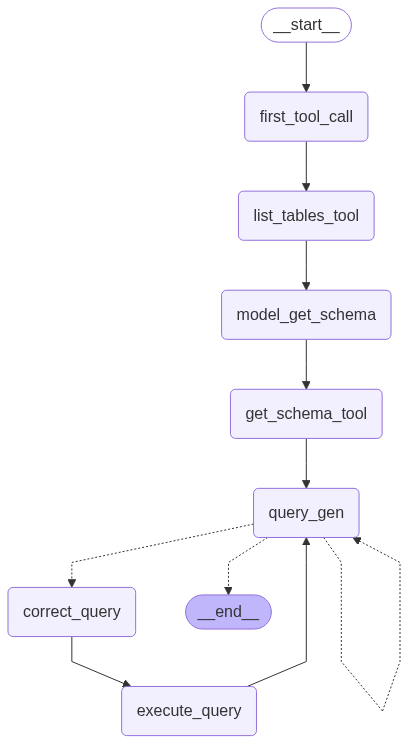

In [62]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [65]:
query={"messages": [("user", "Tell me name of the employee who's salary is more than 30000?")]}

In [66]:
response=app.invoke(query)

TypeError: unhashable type: 'AIMessage'

In [ ]:
response["messages"][-1].tool_calls[0]["args"]["final_answer"]

In [67]:
query={"messages": [("user", "Tell me about all the orders")]}
response = app.invoke(query)

TypeError: unhashable type: 'AIMessage'

In [ ]:
response["messages"][-1].tool_calls[0]["args"]["final_answer"]

In [ ]:
query={"messages": [("user", "Show the phone numbers of customers whose last name is 'Smith'?")]}
response = app.invoke(query)

In [ ]:
response["messages"][-1].tool_calls[0]["args"]["final_answer"]